In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/CSE475 LAB/cinema_hall_ticket_sales.csv')

In [ ]:
df

,Ticket_ID,Age,Ticket_Price,Movie_Genre,Seat_Type,Number_of_Person,Purchase_Again
0,N4369,55,12.27,Comedy,Standard,7,No
1,B8091,35,19.02,Drama,Standard,Alone,Yes
2,V6341,55,22.52,Horror,VIP,3,No
3,B3243,53,23.01,Drama,Standard,6,Yes
4,I3814,30,21.81,Comedy,VIP,4,Yes
...,...,...,...,...,...,...,...
1435,E5406,41,17.09,Sci-Fi,Standard,2,Yes
1436,C4357,19,11.45,Action,Standard,Alone,No
1437,R7285,53,17.13,Comedy,Premium,Alone,Yes
1438,W6360,34,20.25,Comedy,Premium,2,Yes


In [ ]:
df.head(10)

,Ticket_ID,Age,Ticket_Price,Movie_Genre,Seat_Type,Number_of_Person,Purchase_Again
0,N4369,55,12.27,Comedy,Standard,7,No
1,B8091,35,19.02,Drama,Standard,Alone,Yes
2,V6341,55,22.52,Horror,VIP,3,No
3,B3243,53,23.01,Drama,Standard,6,Yes
4,I3814,30,21.81,Comedy,VIP,4,Yes
5,E5655,28,11.58,Horror,VIP,Alone,Yes
6,P1526,50,22.91,Action,Standard,Alone,Yes
7,V4726,44,23.09,Sci-Fi,Premium,7,Yes
8,A2029,46,12.12,Sci-Fi,Standard,Alone,Yes
9,P0092,48,19.63,Action,VIP,Alone,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Ticket_ID         1440 non-null   object 
 1   Age               1440 non-null   int64  
 2   Ticket_Price      1440 non-null   float64
 3   Movie_Genre       1440 non-null   object 
 4   Seat_Type         1440 non-null   object 
 5   Number_of_Person  1440 non-null   object 
 6   Purchase_Again    1440 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 78.9+ KB


In [ ]:
duplicate = df[df.duplicated()]
df

,Ticket_ID,Age,Ticket_Price,Movie_Genre,Seat_Type,Number_of_Person,Purchase_Again
0,N4369,55,12.27,Comedy,Standard,7,No
1,B8091,35,19.02,Drama,Standard,Alone,Yes
2,V6341,55,22.52,Horror,VIP,3,No
3,B3243,53,23.01,Drama,Standard,6,Yes
4,I3814,30,21.81,Comedy,VIP,4,Yes
...,...,...,...,...,...,...,...
1435,E5406,41,17.09,Sci-Fi,Standard,2,Yes
1436,C4357,19,11.45,Action,Standard,Alone,No
1437,R7285,53,17.13,Comedy,Premium,Alone,Yes
1438,W6360,34,20.25,Comedy,Premium,2,Yes


# **EXPLORATORY DATA ANALYSIS BEFORE PREPROCESSING:**

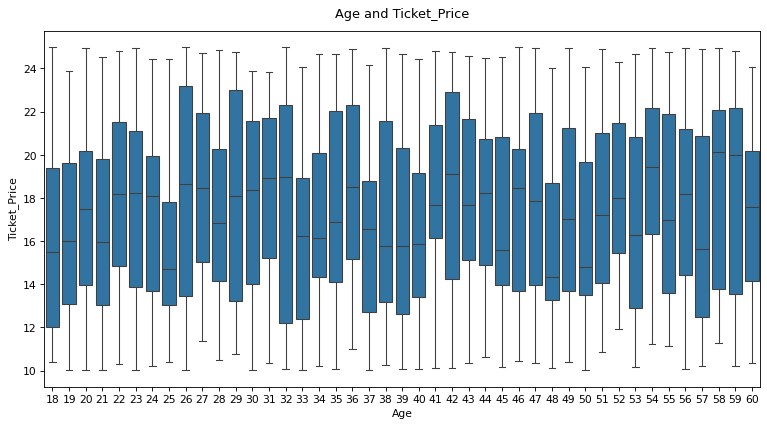

In [ ]:
plt.figure(figsize=(12,6), dpi=77)
sns.boxplot(x="Age", y="Ticket_Price", data=df)
plt.title('Age and Ticket_Price', pad=13)
plt.xlabel('Age')
plt.ylabel('Ticket_Price')
plt.show()

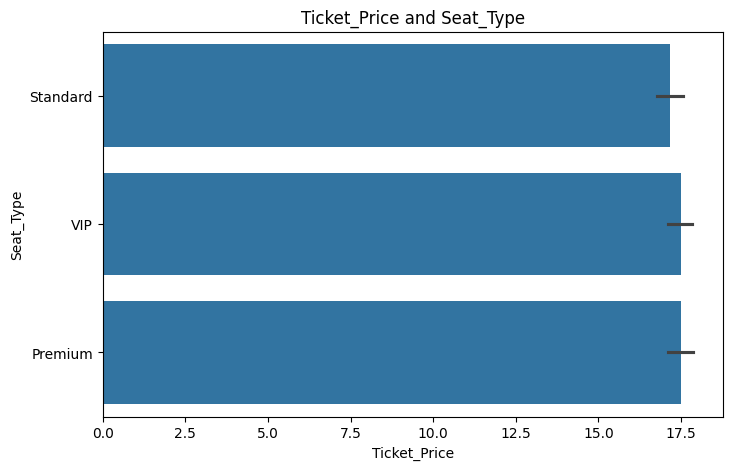

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Ticket_Price', y='Seat_Type', data=df)  # Change columns
plt.title('Ticket_Price and Seat_Type')
plt.xlabel('Ticket_Price')
plt.ylabel('Seat_Type')
plt.show()

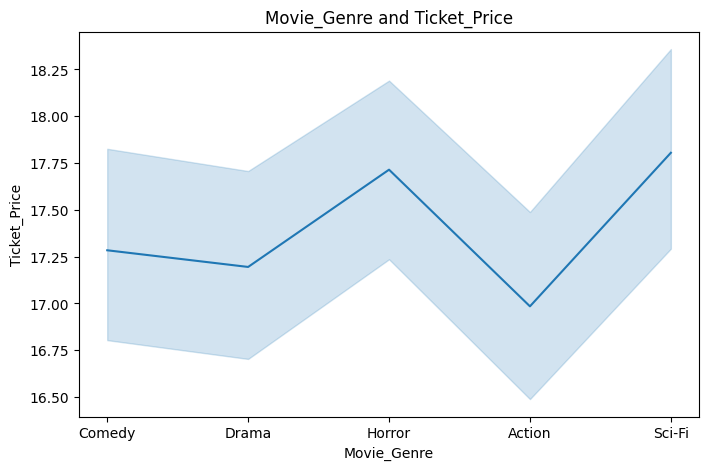

In [ ]:
plt.figure(figsize=(8, 5))
sns.lineplot(x='Movie_Genre', y='Ticket_Price', data=df)  # Change columns
plt.title('Movie_Genre and Ticket_Price')
plt.xlabel('Movie_Genre')
plt.ylabel('Ticket_Price')
plt.show()

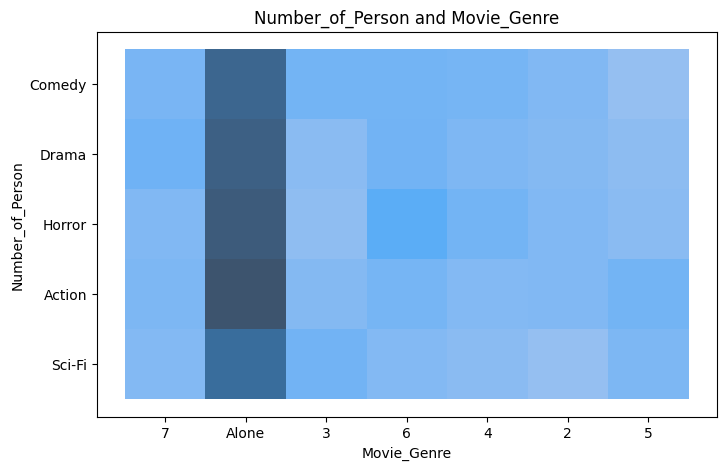

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(x='Number_of_Person', y='Movie_Genre', data=df)  # Change columns
plt.title('Number_of_Person and Movie_Genre')
plt.ylabel('Number_of_Person')
plt.xlabel('Movie_Genre')
plt.show()

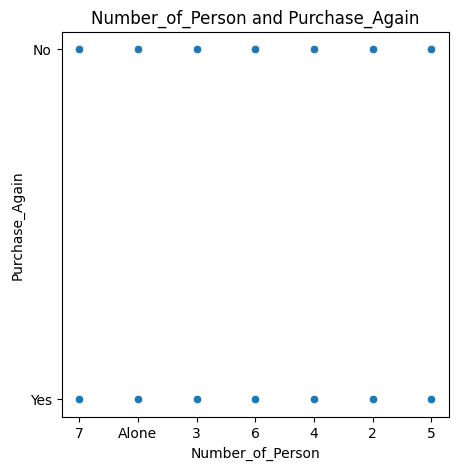

In [ ]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x='Number_of_Person', y='Purchase_Again', data=df)  # Change columns
plt.title('Number_of_Person and Purchase_Again')
plt.xlabel('Number_of_Person')
plt.ylabel('Purchase_Again')
plt.show()

In [ ]:
df.isnull().sum()

,0
Ticket_ID,0
Age,0
Ticket_Price,0
Movie_Genre,0
Seat_Type,0
Number_of_Person,0
Purchase_Again,0


<Axes: >

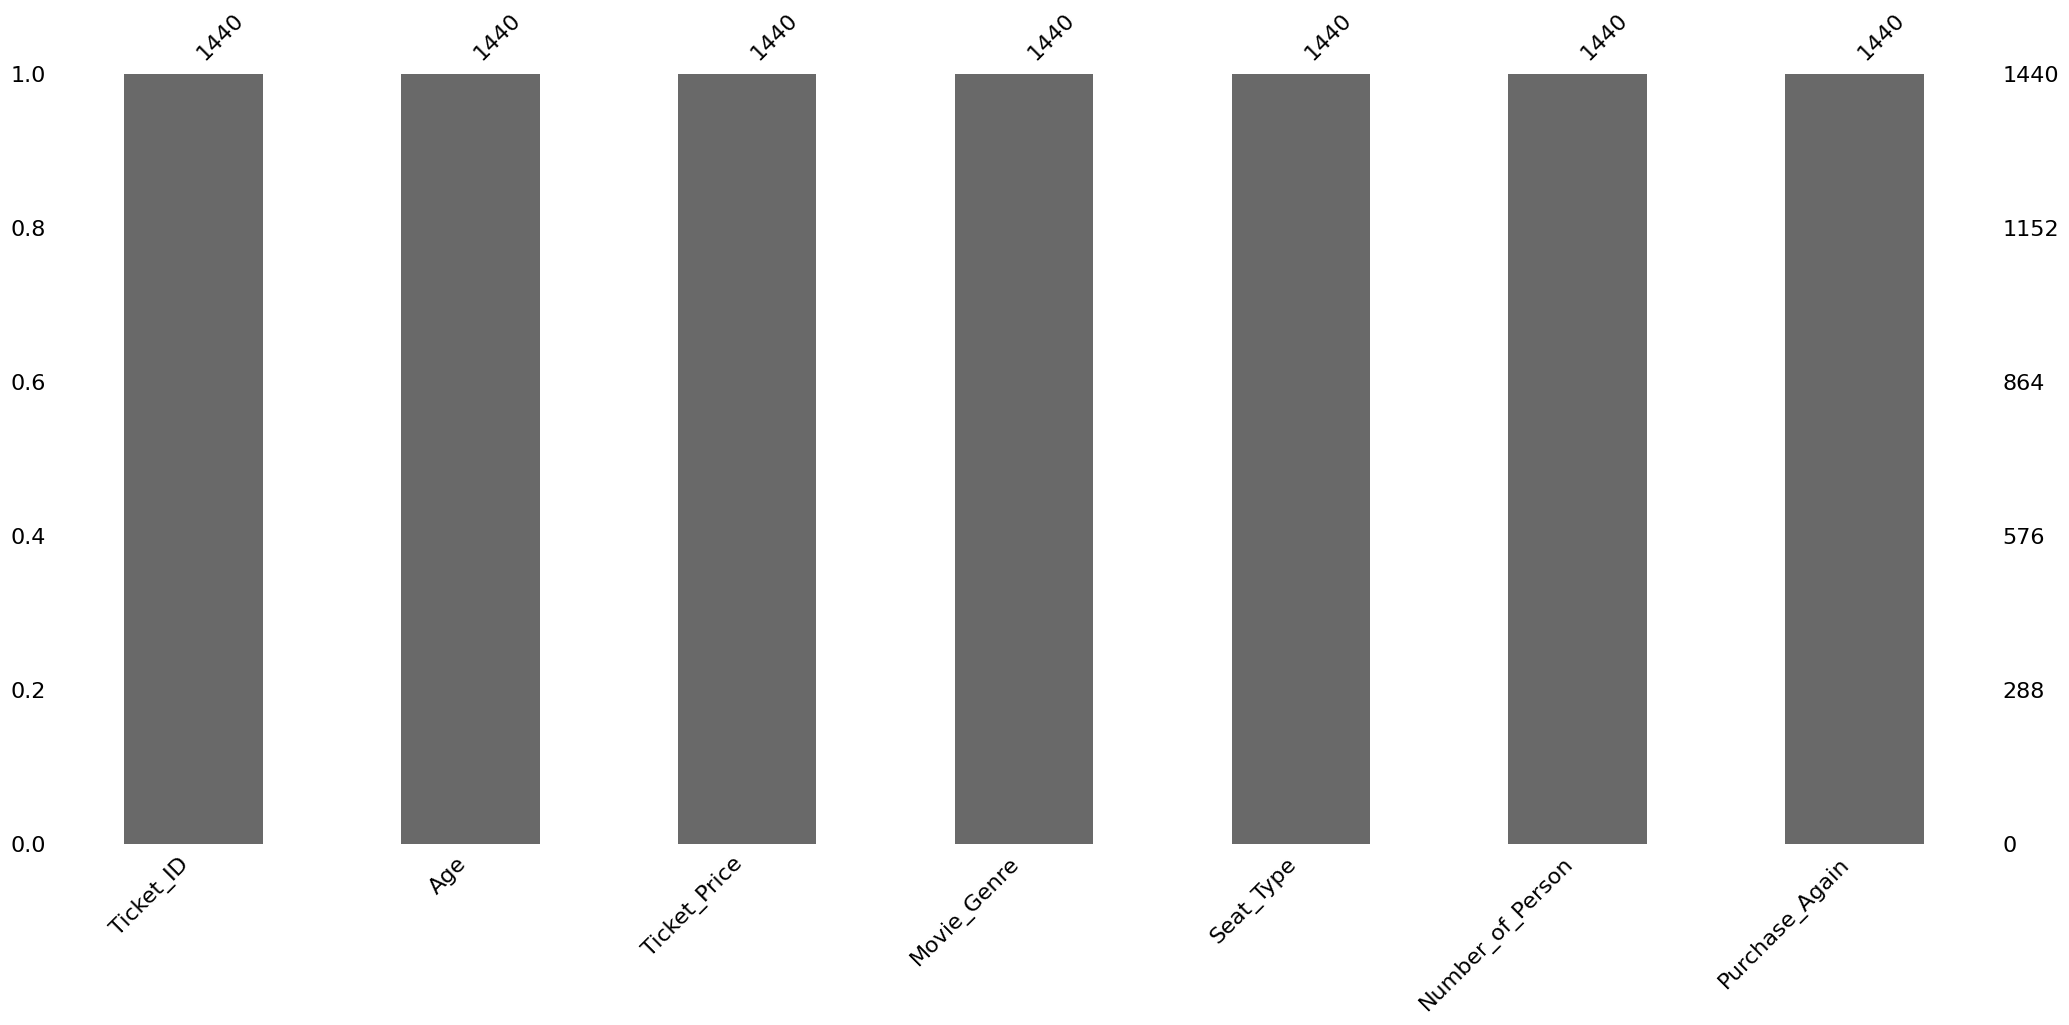

In [ ]:
import missingno as msno
msno.bar(df)

In [ ]:
df.describe()

,Age,Ticket_Price
count,1440.000000,1440.000000
mean,38.904861,17.383972
std,12.426293,4.397087
min,18.000000,10.010000
25%,28.000000,13.640000
50%,39.000000,17.280000
75%,50.000000,21.392500
max,60.000000,24.990000


In [ ]:
df_c = df.copy()

In [ ]:
find = df_c['Ticket_ID'].unique()
print(find.size)
print(find)

1436
['N4369' 'B8091' 'V6341' ... 'R7285' 'W6360' 'Z8034']


In [ ]:
find = df_c['Movie_Genre'].unique()
print(find.size)
print(find)

5
['Comedy' 'Drama' 'Horror' 'Action' 'Sci-Fi']


In [ ]:
Movie_Genre_mapping = {'Comedy': 0, 'Drama': 1,'Horror':2,'Action':3,'Sci-Fi':4 }
df_c['Movie_Genre'] = df_c['Movie_Genre'].map(Movie_Genre_mapping)



In [ ]:
find = df_c['Seat_Type'].unique()
print(find.size)
print(find)

3
['Standard' 'VIP' 'Premium']


In [ ]:
Seat_Type_mapping = {'Standard': 0, 'VIP': 1, 'Premium':2 }
df_c['Seat_Type'] = df_c['Seat_Type'].map(Seat_Type_mapping)

In [ ]:
find = df_c['Number_of_Person'].unique()
print(find.size)
print(find)

7
['7' 'Alone' '3' '6' '4' '2' '5']


In [ ]:
Number_of_Person_mapping = {'Alone': 1,'7':2,'3':3,'6':4,'4':5, '2':6, '5':7 }
df_c['Number_of_Person'] = df_c['Number_of_Person'].map(Number_of_Person_mapping)

In [ ]:
find = df_c['Purchase_Again'].unique()
print(find.size)
print(find)

2
['No' 'Yes']


In [ ]:
Purchase_Again_mapping = {'No': 0, 'Yes': 1 }
df_c['Purchase_Again'] = df_c['Purchase_Again'].map(Purchase_Again_mapping)

In [ ]:
print(df_c.dtypes)

Ticket_ID            object
Age                   int64
Ticket_Price        float64
Movie_Genre           int64
Seat_Type             int64
Number_of_Person      int64
Purchase_Again        int64
dtype: object


In [ ]:
df_c

,Ticket_ID,Age,Ticket_Price,Movie_Genre,Seat_Type,Number_of_Person,Purchase_Again
0,N4369,55,12.27,0,0,2,0
1,B8091,35,19.02,1,0,1,1
2,V6341,55,22.52,2,1,3,0
3,B3243,53,23.01,1,0,4,1
4,I3814,30,21.81,0,1,5,1
...,...,...,...,...,...,...,...
1435,E5406,41,17.09,4,0,6,1
1436,C4357,19,11.45,3,0,1,0
1437,R7285,53,17.13,0,2,1,1
1438,W6360,34,20.25,0,2,6,1


In [ ]:
X = df_c.drop(columns=['Ticket_ID'], inplace=True)
df_c

,Age,Ticket_Price,Movie_Genre,Seat_Type,Number_of_Person,Purchase_Again
0,55,12.27,0,0,2,0
1,35,19.02,1,0,1,1
2,55,22.52,2,1,3,0
3,53,23.01,1,0,4,1
4,30,21.81,0,1,5,1
...,...,...,...,...,...,...
1435,41,17.09,4,0,6,1
1436,19,11.45,3,0,1,0
1437,53,17.13,0,2,1,1
1438,34,20.25,0,2,6,1


In [ ]:
correlation = df_c.corr()
correlation

,Age,Ticket_Price,Movie_Genre,Seat_Type,Number_of_Person,Purchase_Again
Age,1.000000,0.036528,-0.032749,-0.045480,-0.004431,0.023401
Ticket_Price,0.036528,1.000000,0.023321,0.029703,-0.033269,-0.022706
Movie_Genre,-0.032749,0.023321,1.000000,-0.009316,0.010481,-0.006311
Seat_Type,-0.045480,0.029703,-0.009316,1.000000,0.004135,-0.034339
Number_of_Person,-0.004431,-0.033269,0.010481,0.004135,1.000000,0.001469
Purchase_Again,0.023401,-0.022706,-0.006311,-0.034339,0.001469,1.000000


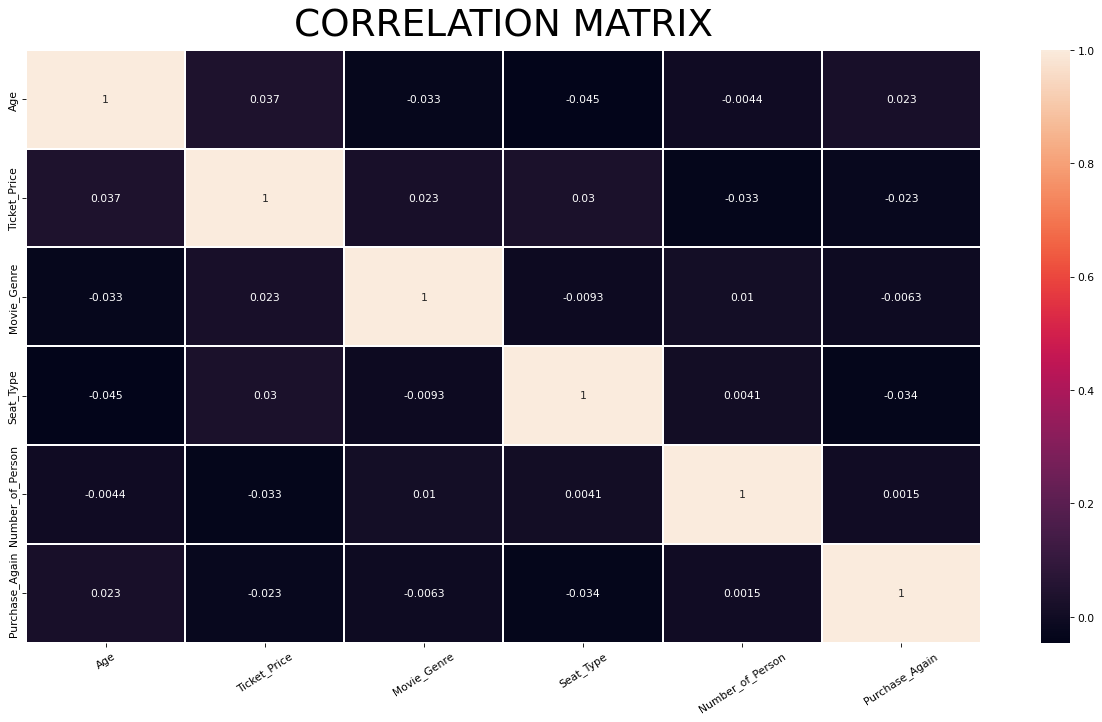

In [ ]:
plt.figure(figsize=(20,10), dpi=77)
sns.heatmap(correlation, linecolor='white',linewidths=0.1, annot=True)
plt.title('Correlation Matrix'.upper(), size=35, pad=13)
plt.xticks(rotation=33)
plt.show()

**#Classification of Machine learning:**

**Support vector machine**

In [ ]:
X = df_c[['Age','Ticket_Price','Movie_Genre','Seat_Type','Number_of_Person']]
y = df_c[['Purchase_Again']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='linear', random_state=42)

# Train the model
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear', random_state=42)

In [ ]:
y_pred = model.predict(X_test)

print(y_pred)

[0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1
 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0
 1 0 1 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1
 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 1 0
 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1
 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1]


In [ ]:
y_pred = model.predict(X_test)

print(y_pred)

[0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1
 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0
 1 0 1 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1
 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 1 0
 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1
 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(y_test, y_pred)
print("Recall (Sensitivity):", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

Accuracy: 0.5104166666666666
Precision: 0.5267857142857143
Recall (Sensitivity): 0.4013605442176871
F1-Score: 0.4555984555984556


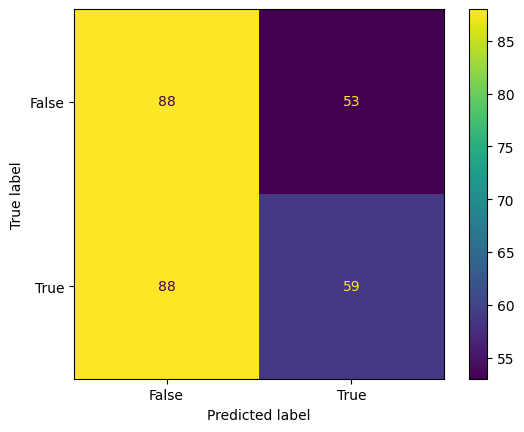

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred_dt = clf.predict(X_test)

In [ ]:
score = clf.score(X_train, y_train)
print(score)

1.0


In [ ]:
score = clf.score(X_test, y_test)
print(score)

0.5451388888888888


In [ ]:
# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy)
# Calculate precision
precision = precision_score(y_test, y_pred_dt)
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(y_test, y_pred_dt)
print("Recall (Sensitivity):", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred_dt)
print("F1-Score:", f1)

Accuracy: 0.5451388888888888
Precision: 0.5540540540540541
Recall (Sensitivity): 0.5578231292517006
F1-Score: 0.5559322033898305


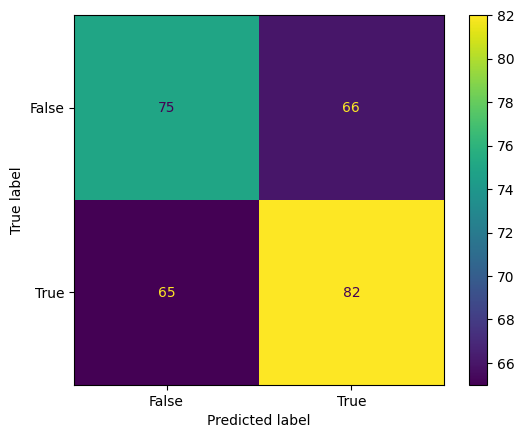

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred_dt)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


1.0
0.53125
Accuracy: 0.53125
Precision: 0.541095890410959
Recall (Sensitivity): 0.5374149659863946
F1-Score: 0.5392491467576792


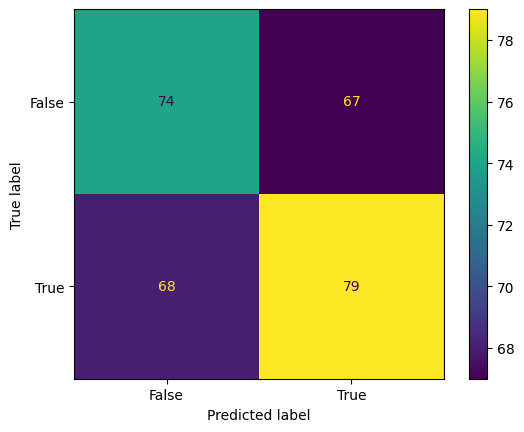

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

score = rf_model.score(X_train, y_train)
print(score)

score = rf_model.score(X_test, y_test)
print(score)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)
# Calculate precision
precision = precision_score(y_test, y_pred_rf)
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(y_test, y_pred_rf)
print("Recall (Sensitivity):", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred_rf)
print("F1-Score:", f1)

import matplotlib.pyplot as plt
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred_rf)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

# **Exploratory Data Analysis (EDA) After Preprossesing:**

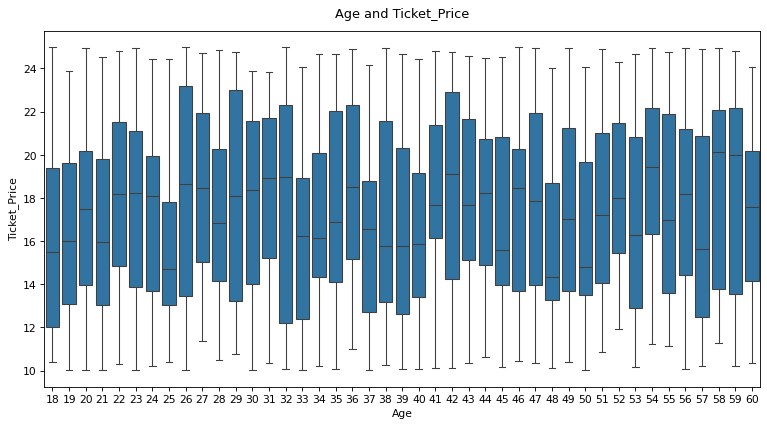

In [ ]:
plt.figure(figsize=(12,6), dpi=77)
sns.boxplot(x="Age", y="Ticket_Price", data=df)
plt.title('Age and Ticket_Price', pad=13)
plt.xlabel('Age')
plt.ylabel('Ticket_Price')
plt.show()


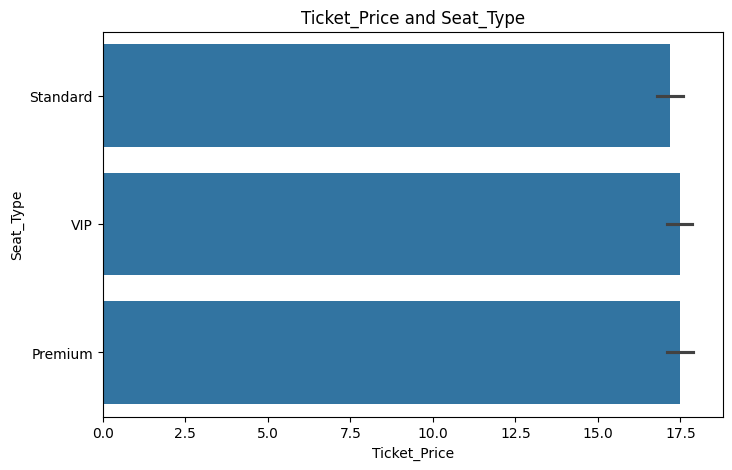

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Ticket_Price', y='Seat_Type', data=df)  # Change columns
plt.title('Ticket_Price and Seat_Type')
plt.xlabel('Ticket_Price')
plt.ylabel('Seat_Type')
plt.show()

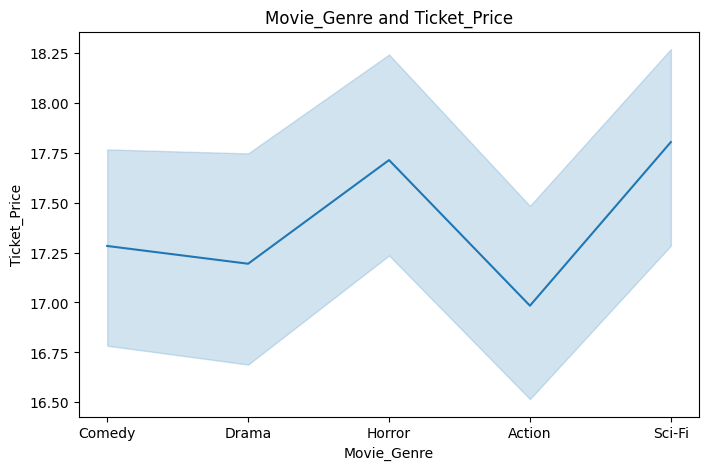

In [ ]:
plt.figure(figsize=(8, 5))
sns.lineplot(x='Movie_Genre', y='Ticket_Price', data=df)  # Change columns
plt.title('Movie_Genre and Ticket_Price')
plt.xlabel('Movie_Genre')
plt.ylabel('Ticket_Price')
plt.show()


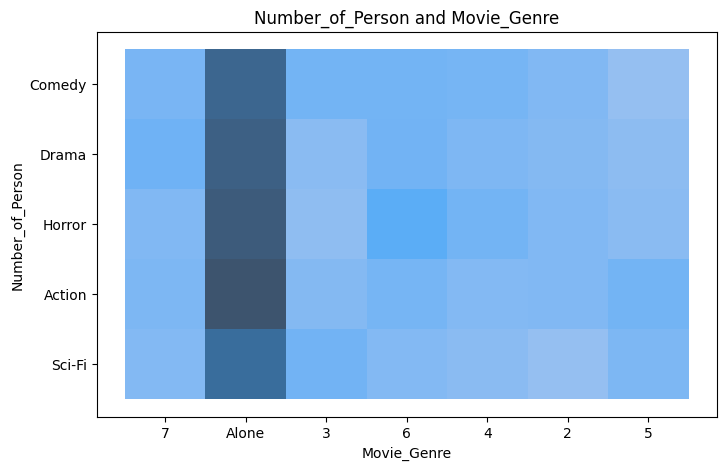

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(x='Number_of_Person', y='Movie_Genre', data=df)  # Change columns
plt.title('Number_of_Person and Movie_Genre')
plt.ylabel('Number_of_Person')
plt.xlabel('Movie_Genre')
plt.show()

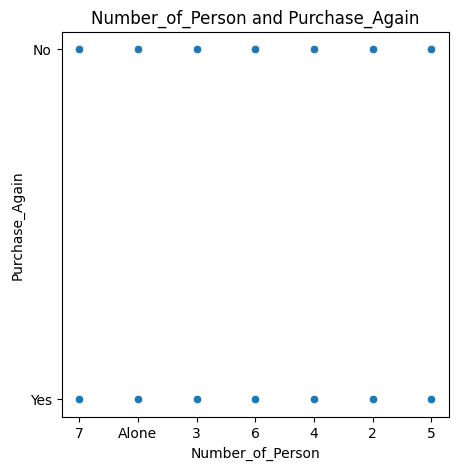

In [ ]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x='Number_of_Person', y='Purchase_Again', data=df)  # Change columns
plt.title('Number_of_Person and Purchase_Again')
plt.xlabel('Number_of_Person')
plt.ylabel('Purchase_Again')
plt.show()